<a href="https://colab.research.google.com/github/RafalWar/DeepLearning/blob/master/Reuters_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
#y_train = np.asarray(train_labels).astype('float32')
#y_test = np.asarray(test_labels).astype('float32')


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
y_val.shape
partial_y_train.shape

(7982, 46)

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 191us/step - loss: 2.6243 - acc: 0.5368 - val_loss: 1.7097 - val_acc: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4125 - acc: 0.7055 - val_loss: 1.2946 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0439 - acc: 0.7746 - val_loss: 1.1326 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8192 - acc: 0.8269 - val_loss: 1.0485 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.6448 - acc: 0.8652 - val_loss: 0.9559 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5140 - acc: 0.8928 - val_loss: 0.9483 - val_acc: 0.8000
Epoch 7/20
7982/7982 [============

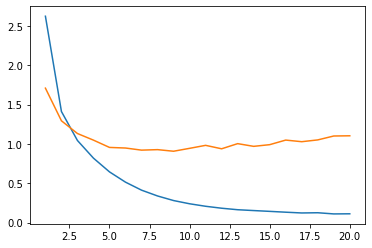

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

plt.show()

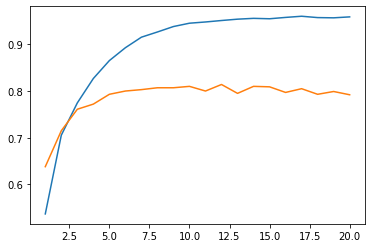

In [9]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.show()

In [10]:
print(model.evaluate(x_test,one_hot_test_labels))

2246/2246 [==============================] - 0s 91us/step
[1.2025274604107796, 0.7867319679430098]


In [22]:
predictions = model.predict(x_test)
print(predictions.shape)
print(predictions[0].shape)
print(np.argmax(predictions[0]))
np.set_printoptions(precision=3)
print(predictions[0])
print([ "{:0.3f}".format(x) for x in predictions[0] ])

(2246, 46)
(46,)
3
[9.226e-07 1.557e-05 5.627e-08 9.737e-01 2.481e-02 4.515e-07 6.021e-08
 5.966e-06 9.837e-05 4.518e-06 9.003e-07 6.105e-04 4.892e-06 5.143e-07
 2.691e-06 1.389e-08 7.545e-06 3.947e-06 1.026e-06 8.594e-06 4.232e-04
 6.804e-05 1.933e-08 9.437e-07 1.825e-06 1.835e-07 4.468e-08 6.935e-07
 2.213e-06 8.837e-06 6.425e-05 1.348e-08 1.427e-06 7.321e-08 6.904e-05
 1.695e-08 1.012e-04 3.062e-07 8.824e-06 2.458e-06 3.549e-07 1.048e-07
 1.103e-08 3.867e-06 2.034e-08 6.061e-06]
['0.000', '0.000', '0.000', '0.974', '0.025', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.001', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
